<a href="https://colab.research.google.com/github/abid-mugdho9875/Deep_learning/blob/main/flower_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation To Address Overfitting In Flower Classification CNN

In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

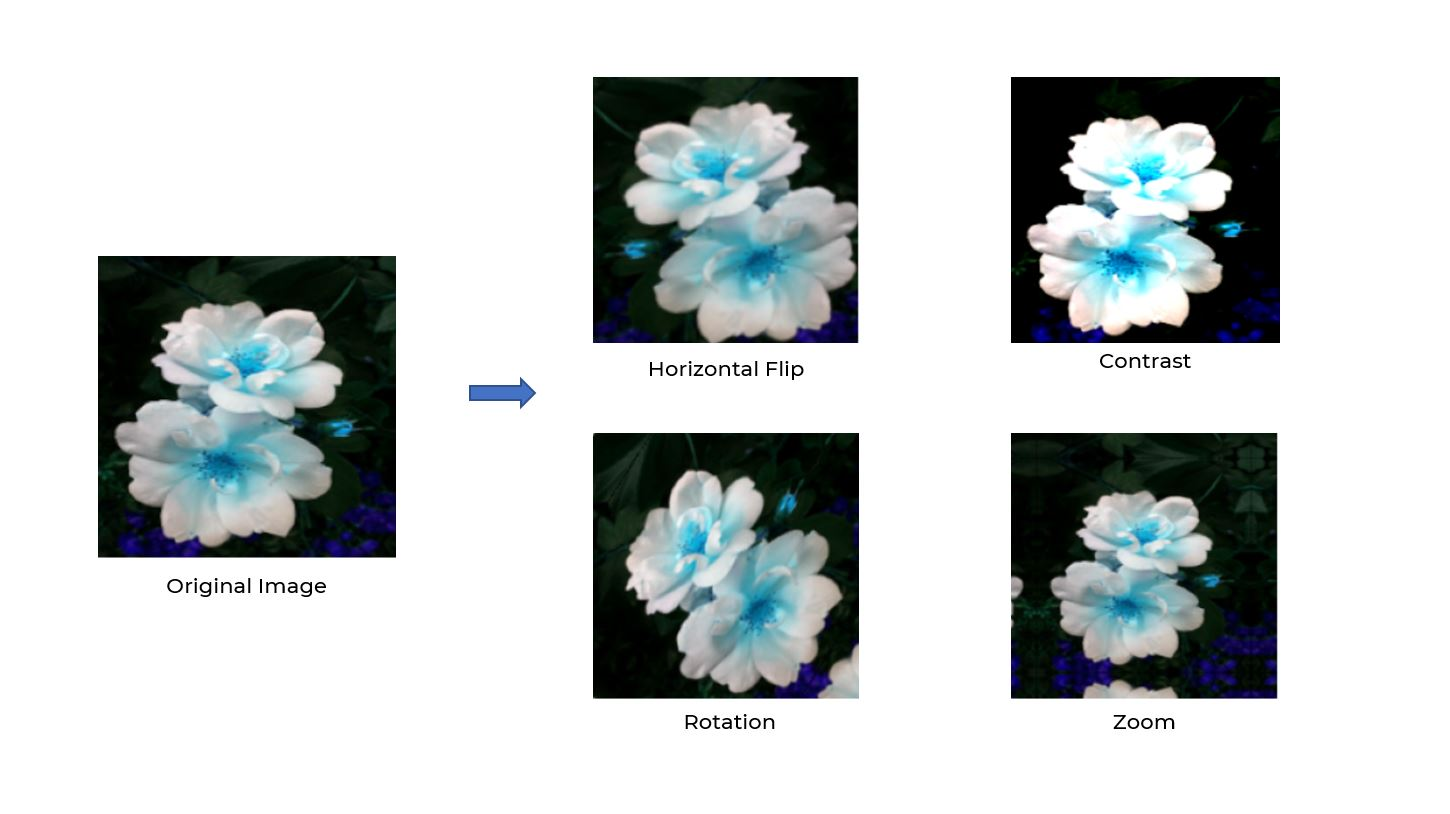


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Load Dataset 

directory  contains 5 sub directories

flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 1s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [4]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

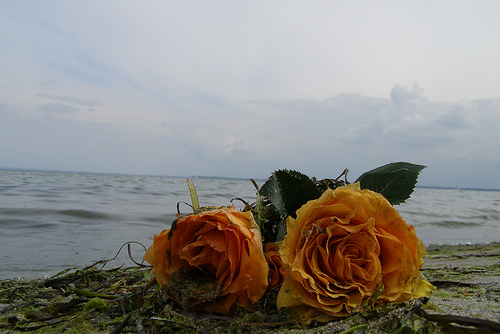

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [6]:
data_dir.glob('roses/*')

<generator object Path.glob at 0x7fa246bac750>

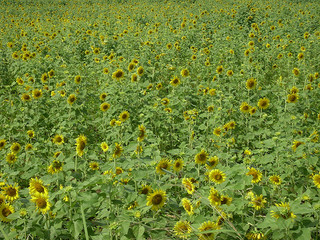

In [7]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
flowers_images_dict['roses'][:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/159079265_d77a9ac920_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg')]

In [11]:
str(flowers_images_dict['roses'][0])

'/root/.keras/datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
   for image in images:
       img = cv2.imread(str(image))
       resized_img = cv2.resize(img,(180,180))
       X.append(resized_img)
       y.append(flowers_labels_dict[flower_name])
     




In [14]:
X=np.array(X)
y=np.array(y)

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
len(X_train)
len(y_test)

918

In [17]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Define Some Parameter for the loader 

Build convolutional neural network and train i

In [18]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 34s 19ms/step - loss: 1.6941 - accuracy: 0.2807
Epoch 2/10
86/86 [==============================] - 2s 19ms/step - loss: 1.1012 - accuracy: 0.5541
Epoch 3/10
86/86 [==============================] - 2s 19ms/step - loss: 0.8302 - accuracy: 0.6908
Epoch 4/10
86/86 [==============================] - 2s 19ms/step - loss: 0.6470 - accuracy: 0.7651
Epoch 5/10
86/86 [==============================] - 2s 19ms/step - loss: 0.3890 - accuracy: 0.8698
Epoch 6/10
86/86 [==============================] - 2s 19ms/step - loss: 0.2815 - accuracy: 0.9047
Epoch 7/10
86/86 [==============================] - 2s 19ms/step - loss: 0.1399 - accuracy: 0.9595
Epoch 8/10
86/86 [==============================] - 2s 19ms/step - loss: 0.0525 - accuracy: 0.9875
Epoch 9/10
86/86 [==============================] - 2s 19ms/step - loss: 0.0317 - accuracy: 0.9949
Epoch 10/10
86/86 [==============================] - 2s 19ms/step - loss: 0.0125 - accuracy: 0.9990


In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 17ms/step - loss: 2.6133 - accuracy: 0.5926


[2.6132967472076416, 0.5925925970077515]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (59.29%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [25]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -2.1428566 ,   5.7479773 ,   3.5520687 ,  -3.471044  ,
         -1.3107953 ],
       [  8.617113  ,   2.9727802 ,  -2.5991964 ,   3.7003036 ,
          7.513956  ],
       [ -0.70148534,   1.6093537 ,  10.135513  ,  -1.8830656 ,
         -3.1170552 ],
       ...,
       [  1.9500346 ,  -6.0325856 ,  -3.2582147 ,  18.466454  ,
         -0.04724601],
       [  7.4184527 ,  -1.4487818 ,  -5.212076  , -11.385046  ,
         13.910082  ],
       [ -4.4112496 ,  -0.59610236,   3.6072407 ,  14.259206  ,
          2.1087527 ]], dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])

In [27]:
np.argmax(score)

1

In [28]:
y_test[0]


1


Improve Test Accuracy Using Data Augmentation

In [29]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Original Image

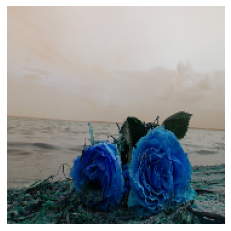

In [30]:
plt.axis('off')
plt.imshow(X[0])


Newly generated training sample using data augmentation

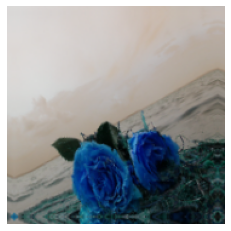

In [31]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [32]:

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 2s 21ms/step - loss: 1.4348 - accuracy: 0.3691
Epoch 2/10
86/86 [==============================] - 2s 20ms/step - loss: 1.0897 - accuracy: 0.5743
Epoch 3/10
86/86 [==============================] - 2s 20ms/step - loss: 0.9665 - accuracy: 0.6083
Epoch 4/10
86/86 [==============================] - 2s 20ms/step - loss: 0.9046 - accuracy: 0.6374
Epoch 5/10
86/86 [==============================] - 2s 20ms/step - loss: 0.8492 - accuracy: 0.6697
Epoch 6/10
86/86 [==============================] - 2s 20ms/step - loss: 0.7944 - accuracy: 0.6994
Epoch 7/10
86/86 [==============================] - 2s 20ms/step - loss: 0.7662 - accuracy: 0.7123
Epoch 8/10
86/86 [==============================] - 2s 20ms/step - loss: 0.6911 - accuracy: 0.7328
Epoch 9/10
86/86 [==============================] - 2s 20ms/step - loss: 0.6850 - accuracy: 0.7324
Epoch 10/10
86/86 [==============================] - 2s 20ms/step - loss: 0.6434 - accuracy: 0.7552


In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 12ms/step - loss: 0.7639 - accuracy: 0.7190


[0.7639127373695374, 0.7189542651176453]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 71.89%